In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt

from duke_dbt_data import dcmread_image, read_boxes, draw_box

In [2]:
df = read_boxes(boxes_fp="/data/boxes-train.csv", filepaths_fp="/data/file-paths-train.csv")

In [3]:
box_series = df.iloc[0]
view = box_series["View"]
slice_index = box_series["Slice"]
# if you have image data saved in classic path folder structure, read the file path from "classic_path"
# image_path = os.path.join("/data", view_series["classic_path"])
image_path = os.path.join("/data", box_series["descriptive_path"])

In [4]:
%%time
image = dcmread_image(fp=image_path, view=view, index=slice_index)

/usr/local/lib/python3.8/site-packages/openjpeg/utils.py:189: UserWarning: The (0028,0101) Bits Stored value '10' in the dataset does not match the component precision value '16' found in the JPEG 2000 data. It's recommended that you change the Bits Stored value to produce the correct output
  warnings.warn(


CPU times: user 12.5 s, sys: 160 ms, total: 12.7 s
Wall time: 12.7 s


In [5]:
x, y, width, height = box_series[["X", "Y", "Width", "Height"]]
image = draw_box(image=image, x=x, y=y, width=width, height=height, lw=10)

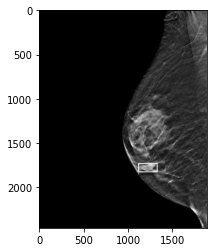

In [6]:
plt.imshow(image, cmap=plt.cm.gray);